<a href="https://colab.research.google.com/github/amityadav108/PROJECT---Customer-Churn-Prediction/blob/main/PROJECT_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJECT - COSTOMER CHURN PREDICTION
This project predicts whether a customer will leave the company (CHURN) based on their features.

### STEP-1 IMPORT REQUIRED LIBRARIES

In [ ]:
# Basic Data Handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### STEP - 2 LOAD THE DATASET

In [ ]:
df = pd.read_csv("Telco_Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### STEP - 3 UNDERSTANDING THE DATASET & INFO

In [ ]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

### STEP - 4 REPLACE MISSING VALUES

In [ ]:
# Some values in TotalCharges are blank → converted to numbers
# Missing values replaced with median

df["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna({'TotalCharges': df['TotalCharges'].median()}, inplace=True)

### STEP - 5 DROP UNWANTED COLUMNS

In [ ]:
# customerID is just an ID → does not help the model.

df.drop(columns=['customerID'], inplace=True)

### STEP - 6 CONVERT CATEGORICAL COLUMNS TO NUMBERS

In [ ]:
# ML models only understand numbers → label-encode all text columns.

le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

### STEP - 7 SPLIT DATA FOR TRAINING

In [ ]:
# X = input features (without Churn column)
# y = output (Churn = Yes/No)
# Split 80% → training, 20% → testing

X = df.drop('Churn', axis=1)  # features
y = df['Churn']               # target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### STEP - 8 TRAIN THE ML MODEL
We use the RandomForest for the train the model because
Random Forest is:
* Easy
* Very accurate
* Works well with large datasets

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### STEP - 9 PREDICT ON THE TEST DATA

In [ ]:
y_pred = model.predict(X_test)

### STEP - 10 MEASURE ACCURACY

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy*100        # for percentage value multiply by 100

79.77288857345636

### STEP - 11 CONFUSION MATRIX

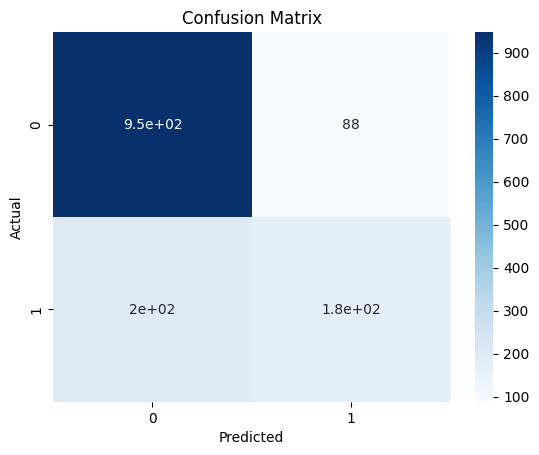

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### STEP - 12 PREDICT FOR A NEW FAKE COSTOMER
#### Example - 1

In [ ]:
new_customer = {
    'gender': 1,
    'SeniorCitizen': 0,
    'Partner': 1,
    'Dependents': 0,
    'tenure': 12,
    'PhoneService': 1,
    'MultipleLines': 0,
    'InternetService': 2,
    'OnlineSecurity': 1,
    'OnlineBackup': 1,
    'DeviceProtection': 0,
    'TechSupport': 0,
    'StreamingTV': 1,
    'StreamingMovies': 0,
    'Contract': 1,
    'PaperlessBilling': 1,
    'PaymentMethod': 2,
    'MonthlyCharges': 70.5,
    'TotalCharges': 800
}

new_customer_df = pd.DataFrame([new_customer])
prediction = model.predict(new_customer_df)

print("Churn Prediction:", "Yes" if prediction[0] == 1 else "No")

Churn Prediction: No


#### Example - 2

In [ ]:
new_customer2 = {
    'gender': 0,
    'SeniorCitizen': 1,
    'Partner': 0,
    'Dependents': 0,
    'tenure': 2,
    'PhoneService': 1,
    'MultipleLines': 0,
    'InternetService': 1,
    'OnlineSecurity': 0,
    'OnlineBackup': 0,
    'DeviceProtection': 0,
    'TechSupport': 0,
    'StreamingTV': 0,
    'StreamingMovies': 0,
    'Contract': 0,              # month-to-month → high churn
    'PaperlessBilling': 1,
    'PaymentMethod': 3,
    'MonthlyCharges': 89.0,
    'TotalCharges': 150
}

new_customer2_df = pd.DataFrame([new_customer2])
prediction2 = model.predict(new_customer2_df)

print("Churn Prediction:", "Yes" if prediction2[0] == 1 else "No")


Churn Prediction: Yes


#### Example - 3

In [ ]:
new_customer3 = {
    'gender': 1,
    'SeniorCitizen': 0,
    'Partner': 1,
    'Dependents': 1,
    'tenure': 45,
    'PhoneService': 1,
    'MultipleLines': 1,
    'InternetService': 2,
    'OnlineSecurity': 1,
    'OnlineBackup': 1,
    'DeviceProtection': 1,
    'TechSupport': 1,
    'StreamingTV': 1,
    'StreamingMovies': 1,
    'Contract': 2,              # 2-year → very low churn
    'PaperlessBilling': 0,
    'PaymentMethod': 1,
    'MonthlyCharges': 65.0,
    'TotalCharges': 2800
}

new_customer3_df = pd.DataFrame([new_customer3])
prediction3 = model.predict(new_customer3_df)

print("Churn Prediction:", "Yes" if prediction3[0] == 1 else "No")

Churn Prediction: No
